## Serie de Fourier


Si $f(t)$  es una función de variable real $t$, que es integrable en el intervalo $[-t_o-T/2,t_o+T/2]$  entonces se puede obtener el desarrollo en serie de Fourier de $f(t)$ en ese intervalo. 

Fuera del intervalo la serie es periódica, con período $T$. 

Si $f(t)$ es periódica en toda la recta real, la aproximación por series de Fourier también será válida en todos los valores de $t$. 

### Serie de Fourier trigonometrica

Luego la serie de Fourier asociada a $f(t)$ es:

$f(t) \sim \frac{a_0}{2} + \sum_{n=1}^\infty [ a_n cos(\frac{2n\pi}{T} t) + b_n sin(\frac{2n\pi}{T} t)]$

Donde $a_0$, $a_n$ y $b_n$ son los coeficientes de Fourier que toman los valores:

$a_0 = \frac{2}{T} \int_{t_o}^{t_o+T}  f(t) dt$

$a_n = \frac{2}{T} \int_{t_o}^{t_o+T}  f(t) cos(\frac{2 n \pi}{T} t) dt$

$b_n = \frac{2}{T} \int_{t_o}^{t_o+T}  f(t) sin(\frac{2 n \pi}{T} t) dt$


### Serie de Fourier exponencial

Por la identidad de Euler, las fórmulas de arriba pueden expresarse también en su forma compleja:

$f(t) \sim \sum_{n=-\infty}^{\infty} c_{n} e^{j 2 \pi \frac{n}{t}}$

Los coeficientes ahora serían:

$c_n = \frac{1}{T}\int_{t_o}^{t_o+T} f(t)\,e^{-2\pi i \frac{n}{T} t} dt$

Otra forma de definir la serie de Fourier es:

$f(t) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n cos(2 \pi n) + b_n sin(2 \pi n)$

donde $\omega_n = n\omega$ y $\omega = 2 \pi f_o = \frac{2 \pi}{T}$

siendo:

$a_0 = \frac{2}{T} \int_{t_o}^{t_o+T} f(t) dt$

$a_n = \frac{2}{T} \int_{t_o}^{t_o+T} f(t) cos(\omega_n t) dt$ 

$b_n = \frac{2}{T} \int_{t_o}^{t_o+T} f(t) sin(\omega_n t) dt$

Esta forma de la serie de Fourier se le conoce como la serie trigonométrica de Fourier.

### Euler's formula:
$e^{ i \theta} = cos(\theta) + i \cdot sin(\theta)$


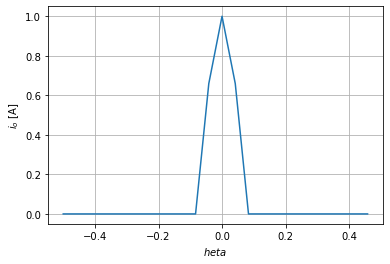

a0 =0.10
a1 =0.19
a2 =0.18
a3 =0.16
a4 =0.14
a5 =0.11
a6 =0.08


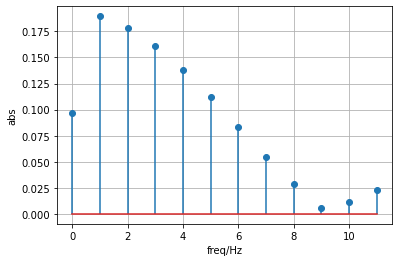

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.

# Serie trigonometrica
def DFTT(x, k):
    N = len(x)
    a = 2/N*sum([s*np.cos(2*np.pi*i/N*k) for i,s in enumerate(x)])
    b = 2/N*sum([s*np.sin(2*np.pi*i/N*k) for i,s in enumerate(x)])
    if k == 0 : a = a /2.
    return a,b

# 
n   = 100
# vector de tiempo 
th  = 2*np.pi*np.linspace(0, 1, num=n)

# frecuancia de la señal
fm   = 1 #Hz
# Amplitud
Ac   = 10 

# senal pulso coseno de frecuencia 10 Hz, 

# muestrea a 100 Sps (muestras por segundo). 
# defino el muestreo
fs =  24*fm     # sample rate, Hz
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 

# Defino el vector de tiempo del muestreo
n = int(T * fs) # total number of samples
t = np.linspace(-T/2, T/2, n, endpoint=False)

# Pulso clase B (coseno)
Sm   = Ac*np.cos(2*np.pi*fm*t)  - 9
# Señal Pulso de coseno
Sp   = np.array([s if s >=  0 else 0  for s in Sm]) 

plt.plot(t, Sp)
plt.ylabel('$i_{o}$ [A]')
plt.xlabel('${\theta}$')
#plt.ylim(0, Ic*1.5)
plt.grid()
plt.show()

# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,fs/2,1/T)

a = [DFTT(Sp,n)[0] for n in range(len(freq))]
b = [DFTT(Sp,n)[1] for n in range(len(freq))]

ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
for i in range(7):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )


plt.stem( freq, np.abs(ab))
#plt.xlim([-2  , 100])
#plt.ylim([-0.1, 4.7])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()


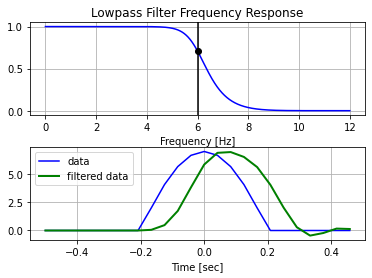

In [12]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
  
cutoff = fs/4  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')

plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.



# Filter the data, and plot both the original and filtered signals.
Sf = butter_lowpass_filter(Sp, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, Sp, 'b-', label='data')
plt.plot(t, Sf, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

a0 =1.83
a1 =3.11
a2 =1.85
a3 =0.56
a4 =0.19
a5 =0.24
a6 =0.04


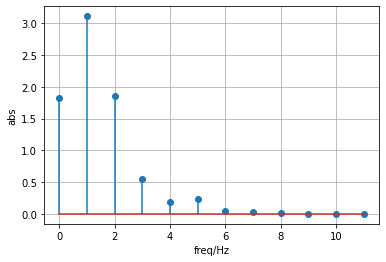

In [13]:
# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,fs/2,1/T)

a = [DFTT(Sf,n)[0] for n in range(len(freq))]
b = [DFTT(Sf,n)[1] for n in range(len(freq))]

ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
for i in range(7):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )


plt.stem( freq, np.abs(ab))
#plt.xlim([-2  , 100])
#plt.ylim([-0.1, 4.7])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()


## Metodo de los trapecios 

El metodo de los trapecios permite calcular las componentes de Fourier de forma aproximada empleando un muestreo discreto.

Este metodo emplea trapecios para estimar el area de calculada por la integral en las componentes de Fourier. 


$f(t) = {a_0} + \sum_{n=1}^\infty\left(a_n\cos\left( \frac{2\pi}{T}\cdot  n \cdot t \right) + b_n\sin \left( \frac{2\pi}{T} \cdot  n \cdot t \right) \right)$


siendo:

$ a_0 = \frac{1}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1} f(T_s \cdot i) \cdot T_s $

$ a_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

$ b_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \sin{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

donde:
$ T   $ es el periodo de la señal, $ T_s $ es el periodo del muestreo y $ N = \frac{T}{T_s} $

Si $N = 24$  resulta entonces (valido para una función par):

$ a_0 = \frac{1}{12} \sum_{i=0}^{\frac{N}{2}-1} f(T_s \cdot i) =  \frac{1}{12} ( \frac{A+B}{2} + \frac{B+C}{2} + \frac{C+D}{2}+ \frac{D+E}{2}+ \frac{E+F}{2}+ \frac{F+G}{2}+ \frac{G+H}{2} + \frac{H+I}{2}+ \frac{I+J}{2}+ \frac{J+K}{2} )   $

$ a_0 = \frac{1}{12} ( \frac{A}{2} + B + C + D +E+ F  + G + H + I + J + \frac{K}{2})   $


$ a_n = \frac{1}{6} \sum_{i=0}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{24} \cdot i \cdot n )} $ 

$ a_n =  \frac{1}{6} ( \frac{A}{2}  + B \cos{\frac{\pi }{12}}+ C \cos{\frac{2\cdot \pi }{12}}+ D\cos{\frac{3\cdot \pi }{12}}+ E\cos{\frac{4\cdot \pi }{12}} + F \cos{\frac{ \cdot \pi  }{12}}+ G \cos{ \frac{ \cdot \pi }{12}}+ H \cos{\frac{7 \cdot \pi }{12}}+ I \cos{\frac{8\cdot \pi }{12}}+ J \cos{\frac{9\cdot \pi }{12}}+ \frac{K}{2}\cos{\frac{10\cdot \pi }{12}} )  $


$ b_n = 0 $ 



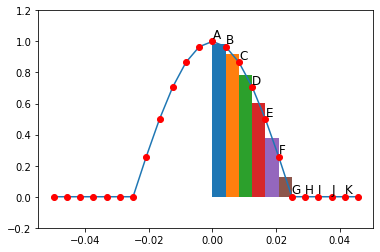

In [2]:
# senal pulso coseno de frecuencia 100 Hz, muestrea a 100e3 Sps (muestras por segundo). 
# En este caso N es 24 
# defino el sampleo
fs = fm*24 #Sps 

# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

# Señal coseno
Sm   = [Ac*np.cos(2*np.pi*fm*t) for t in time] 
# Señal Pulso de coseno
Sm   = [s if s > 0 else 0  for s in Sm] 

# Defino el vector 
myPoint  = [ 'A','B','C','D','E','F','G','H','I','J','K']

plt.plot(time, Sm)
plt.plot(time, Sm, 'ro')
for i, mp in enumerate(myPoint):
    plt.text(time[i+12], Sm[i+12] +0.02, mp, fontsize=12)
    plt.fill_between(time[i+12:i+14], 0, (Sm[i+12] + Sm[i+13] )/2 )
plt.ylim([-0.2,Ac*1.2])
plt.show()